In [1]:
%%javascript
IPython.notebook.config.update({
  "load_extensions": {"calico-spell-check":true,
                      "calico-document-tools":true,
                      "calico-cell-tools":true
                     }
})

<IPython.core.display.Javascript object>

In [2]:
%%html
<style>
div.text_cell_render {
    font-size: 19pt;
}
</style>

$$\newcommand{\ket}[1]{\lvert{#1}\rangle}$$

In [4]:
import numpy
from matplotlib import pyplot

<center>
    <h1> Quantum Computing in the Cloud </h1>
    <h3> <em> An Introduction to Qiskit and IBM Q </em></h3>
    <h4> Adam Murphy, Iain Smith, Liam Tope </h4>
</center>

## Overview

<br>
    
    1. Advantages of Quantum Computations
    
    2. Writing Quantum Programs
    
    3. Qiskit and IBM Q
    
    4. Quantum Gates and Quantum Phenomena
    
    5. Teleportation of Information


### What is Quantum Computing?

- Classical computers store information in bits with binary values 0 or 1.

- Quantum computers store information in quantum-bits (*qubits*), which are represented by 
    a wavefunction $\ket{\psi}~.$

- The wavefunction is given in the form of basis states such as $\ket{0}$ for the energetic ground state
    or $\ket{1}$ for the excited states
    
- Physical examples of bits and qubits include
<br>
<table style="width:50%; cellpadding:2; frame:border;">
    <tr>
        <th> <center><font size="+2">Bits</font></center> </th>
        <th> <center><font size="+2">Qubits</font></center> </th>
    </tr>
    <tr>
        <td> <center><font size="+1">A large and small current/voltage</font></center> </td> 
        <td> <center><font size="+1">Spin state of an electron</font></center> </td>
    </tr>
    <tr>
        <td> <center><font size="+1">Magnetic-core alignment</font></center> </td>
        <td> <center><font size="+1">Polarisations of light</font></center> </td>
    </tr>
    <tr>
        <td> <center><font size="+1">Distinct levels of light intensity</font></center> </td>
        <td> <center><font size="+1">Energy levels of an atom</font></center> </td>
</table>
<br>
- Analogous with logic gates in classical computers, we can construct
  <font color='red'>quantum gates</font> which exploit the quantum behaviour of qubits

### Why Quantum Computing?

- Our current ability to model quantum systems is inherently limited by our data storage techniques

- This data has to be stored at every simulation step in order to calculate the next

- We can bypass this by instead retaining all of the information within the state of the system itself

- This linear scaling allows for us to consider simulations of much larger systems without loss of accuracy




### Writing Quantum Programs

- Any classical program can be executed on a Quantum computer

- But this presents no additional performance

- Instead, programs need to be written which can manipulate the qubits quantum states and exploit quantum phenomena

- We can do this, much like in classical computers, by constructing circuits of (Quantum) gates
<br>
<center>
<font color='red'><u>Example:</u></font>
<img src='https://i.stack.imgur.com/AYfEA.png' style='width:600px;height:250px;'>
</center>

### IBM Q
<ul>
<li>Despite quantum computing technology still being in relatively early stages of
    development, some quantum computers have been developed </li>
<li> IBM have built a 5-qubit quantum computer which anyone can run quantum
    algorithms on via cloud access </li>
</ul>
<br>
<center>
<img src="../images/IBMQ.png" style="width:900px;height:450px;">
</center>    

<img src='https://avatars2.githubusercontent.com/u/30696987?s=200&v=4' align='left' style='width:100px;height:100px'>
<h1>&nbsp; Qiskit </h1>

- Using the IBM Q interface for creating sophisticated quantum algorithms is not very convenient

- Instead, we can use <font color='red'>qiskit</font> (<font color='red'>Q</font>uantum 
  <font color='red'>I</font>nformation <font color='red'>S</font>cience <font color='red'>kit</font>) - a python
  interface for writing quantum algorithms, which can be submitted to IBM Q's quantum computer, 
  or run locally on simulator backends

- Algorithms are written in the same way as they are constructed 
    via IBM Q, following a <font color='navy'>circuit model</font> for universal
    quantum computation
 
- This allows the programs to be run on any quantum hardware which follows this 
    model

We can use `qiskit` to construct our quantum circuit, and 
take measurements of the qubit following an operation by a gate.

In [5]:
# Import qiskit
import qiskit as qk

# Create single bit quantum and classical register
q = qk.QuantumRegister(1)
c = qk.ClassicalRegister(1)
# Build our circuit
circuit = qk.QuantumCircuit(q, c)

# Add an X-gate
circuit.x(q[0])
# Add a measurement
circuit.measure(q[0], c[0])

# Make a circuit diagram
circuit.draw(output="mpl").savefig('x-gate-circuit.svg')

#### The saved circuit diagram:

<center>
<img src='../images/x-gate-circuit.svg' alt="X-gate Circuit" style="width:800px;height:400px;">
</center>

### Executing a Quantum Program

Programs can be run on one of IBM's quantum computers by specifying a user API token and the 
quantum computer we wish to run the job on.

In [6]:
import time
from qiskit import IBMQ, compile
from qiskit.providers.jobstatus import JOB_FINAL_STATES

# Authenticate an account and add for use during this session. Replace string
# argument with your private token.
IBMQ.enable_account("6fea91cc6f5227071b9f0b0d32a3f2fe7873830c1abd5ac47a5bd245f01a3815abb9a346a64feff5d76c733c37113b79aa656f199fc054b121d884d521b070c8")

backend = IBMQ.backends('ibmqx2')[0]
qobj = compile(circuit, backend, shots=2000)
job = backend.run(qobj)

start_time = time.time()
job_status = job.status()
while job_status not in JOB_FINAL_STATES:
    print(f'Status @ {time.time()-start_time:0.0f} s: {job_status.name},'
          f' est. queue position: {job.queue_position()}')
    time.sleep(10)
    job_status = job.status()

result = job.result()
print(result.get_counts())

Status @ 0 s: INITIALIZING, est. queue position: None
Status @ 12 s: QUEUED, est. queue position: 35
Status @ 23 s: QUEUED, est. queue position: 35


KeyboardInterrupt: 

#### Executing a Quantum Program

Executing the simple algorithm given by our quantum circuit
is given by the `execute` method of a `QuantumCircuit` object. The results of the executed program are also a method.

In [7]:
from qiskit import BasicAer

# Specify the simulator backend to be used
backend = BasicAer.get_backend('qasm_simulator')

# Create a Quantum Program for execution
job = qk.execute(circuit, backend, shots=1000)
result = job.result()

We can also plot a histogram of the output states measured 
in the Classical Register. We simply need to get the number
of counts for each state. Rather than the frequency of
counts, the histogram is given in terms of the probability
of getting a certain result.

In our case we have a 100% certainty of measuring the qubit
in the $\ket{1}$ state. 

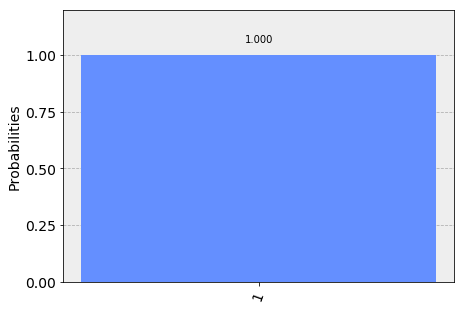

In [8]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(result.get_counts(circuit))

<center>
    <h1> Exercise 1 </h1>
</center>

In [9]:
# Solutions:

# Just a H-gate
q = qk.QuantumRegister(1)
c = qk.ClassicalRegister(1)
Hcircuit = qk.QuantumCircuit(q, c)

Hcircuit.h(q[0])
Hcircuit.measure(q[0], c[0])
Hcircuit.draw(output="mpl").savefig('h-gate-circuit.svg')

job = qk.execute(Hcircuit, backend, shots=1000)
result = job.result()
plot_histogram(result.get_counts(Hcircuit)).savefig('h-gate-histogram.svg')

# H-gate then X-gate
q = qk.QuantumRegister(1)
c = qk.ClassicalRegister(1)
HXcircuit = qk.QuantumCircuit(q, c)

HXcircuit.h(q[0])
HXcircuit.x(q[0])
HXcircuit.measure(q[0], c[0])
HXcircuit.draw(output="mpl").savefig('h-x-gate-circuit.svg')

job = qk.execute(HXcircuit, backend, shots=1000)
result = job.result()
plot_histogram(result.get_counts(HXcircuit)).savefig('h-x-gate-histogram.svg')

# Two H-gates
q = qk.QuantumRegister(1)
c = qk.ClassicalRegister(1)
HHcircuit = qk.QuantumCircuit(q, c)

HHcircuit.h(q[0])
HHcircuit.h(q[0])
HHcircuit.measure(q[0], c[0])
HHcircuit.draw(output="mpl").savefig('h-h-gate-circuit.svg')

job = qk.execute(HHcircuit, backend, shots=1000)
result = job.result()
plot_histogram(result.get_counts(HHcircuit)).savefig('h-h-gate-histogram.svg')

In [10]:
%%html
<style>
div.text_cell_render {
    font-size: 19pt;
}
</style>

### H-gate Circuit
<br>
<table>
<tr>
    <th> <center><font size="+1">Circuit Diagram</font></center> </th>
    <th> <center><font size="+1">Histogram</font></center> </th>
</tr> 
    <td> <img src='../images/h-gate-circuit.svg' > </td> 
    <td> <img src='../images/h-gate-histogram.svg'> </td>
</table>

### H-H-Gate Circuit
<br>
<table>
<tr>
    <th> <center><font size="+1">Circuit Diagram</font></center> </th>
    <th> <center><font size="+1">Histogram</font></center> </th>
</tr> 
<tr>    
    <td> <img src='../images/h-h-gate-circuit.svg'> </td> 
    <td> <img src='../images/h-h-gate-histogram.svg'> </td>
</tr>
</table>

### X-H-X-Gate Circuit
<br>
<table>
<tr>
    <th> <center><font size="+1">Circuit Diagram</font></center> </th>
    <th> <center><font size="+1">Histogram</font></center> </th> 
</tr>
<tr>
    <td> <img src='../images/XHXgateCircuit.svg'> </td> 
    <td> <img src='../images/XHXhistogram.svg'> </td>
</tr>
</table>

## Superposition

Using the H-gate we have demonstrated one of the quantum
properties of qubits: <font color='navy'>*Superposition*
</font>.<br>
This is a consequence of the linearity of the
Schr&ouml;dinger equation.

---
<img src="../images/qubit-bit-diagram.svg" style="width:500px;height:500px;" alt="Qubit Diagram" align='left'>




Individual qubits can be represented by a vector of coefficients of their basis
states

$$
    \ket{\psi}~= \left[\begin{array}{c} \alpha \\ \beta \end{array}\right]~,
$$

where the squared modulus of these coefficients gives the probability of the 
qubit being in its respective state, such that

$$
    |\alpha|^2 + |\beta|^2 = 1~.
$$

Similarly, quantum gates can be represented by <font color='red'>permutation
matrices </font>. For example,
the *X-gate* we saw before is

$$
    X = \left[\begin{array}{cc} 0 & 1 \\ 1 & 0 \end{array}\right]~.
$$

### Superposition
<center>
<img src='https://www.motherjones.com/wp-content/uploads/2018/09/blog_schrodinger1.jpg?w=608' style='width:900px;height:450px;'>
</center>

In [11]:
from qiskit.tools.visualization import plot_bloch_vector

plot_bloch_vector([0, 0, 1]).savefig('Zero-state_bloch.svg')
hadamard = (1/numpy.sqrt(2))*numpy.array([[1,1], [1,-1]])
state = numpy.array([1, 0])
new_state = numpy.dot(hadamard, state)

theta = 2.* numpy.arccos(new_state[0])
phi = numpy.arccos((new_state[1]/numpy.sin(theta/2)))

new_vec = [numpy.sin(theta)*numpy.cos(phi), numpy.sin(theta)*numpy.sin(phi), numpy.cos(theta)]

plot_bloch_vector(new_vec).savefig('Superposed-state-bloch.svg')

zrot = numpy.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
zrot_vec = numpy.dot(zrot, new_vec)
plot_bloch_vector(zrot_vec).savefig('z-rot.svg')

yrot = numpy.array([[numpy.cos(numpy.pi/2), 0, numpy.sin(numpy.pi/2)], [0, 1, 0], 
                    [-numpy.sin(numpy.pi/2), 0, numpy.cos(numpy.pi/2)]])

yrot_vec = numpy.dot(yrot, zrot_vec)
plot_bloch_vector(yrot_vec).savefig('y-rot.svg')

### The Hadamard Gate

The Hadamard gate (*H-gate*) has the form

<center>
    <br>
<p style="width: 350px; border:3px; border-style:solid; border-color:#FF0000; padding:1em;">
$$
H = \frac{1}{\sqrt{2}}\left[\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}\right]
$$
</p>
</center>

and represents a state-vector rotation of $\pi$ about the 
$\frac{1}{\sqrt{2}}(\hat{x}+\hat{z})$ axis on the Bloch Sphere. An analogous transformation is
a $\pi$ rotation about the $z$-axis, followed by a $\pi/2$ rotation about the $y$-axis.

### The Hadamard Gate

- When acted upon a basis state, this creates a superposition:

<center><font size="+1">Initial State</font><center> | <center><font size="+1">Superposed State</font></center>
- | - 
<img src='../images/Zero-state_bloch.svg' style='width:350px;height:350px;'> | <img src='../images/Superposed-state-bloch.svg' style='width:350px;height:350px;'> 

### The Hadamard Gate

- When acted upon a superposition state, this creates a basis state:

<table>
    <tr>
        <th> <center><font size="+1">Superposed State</font><center> </th>
        <th> </th>
        <th> <center><font size="+1">$\pi$-rotation about $z$-axis</font></center> </th>
        <th> </th>
        <th> <center><font size="+1">$\frac{\pi}{2}$-rotation about $y$-axis</font></center> </th>
    </tr>
    <tr>
        <td> <img src='../images/Superposed-state-bloch.svg' style='width:350px;height:350px;'> </td>
        <td> <center><font size="+2">$\Rightarrow$</font><center> </td>
        <td> <img src='../images/z-rot.svg' style='width:350px;height:350px;'> </td>
        <td> <center><font size="+2">$\Rightarrow$</font><center> </td>
        <td> <img src='../images/y-rot.svg' style='width:350px;height:350px;'> </td>
    </tr>
</table>

### The Hadamard Gate

- In the exercise, we saw that using two Hadamard gates in a row returned the state
    back to its starting point. 

- We can also show this using Bloch sphere rotations or 
    the permutation matrix:
<br><br>
<center>
<p style="width: 750px; border:3px; border-style:dotted; border-color:#FF0000; padding: 1em;">
$$
    HH\ket{\psi} = \frac{1}{\sqrt{2}}\left[\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}\right]
                \frac{1}{\sqrt{2}}\left[\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}\right]
                \ket{\psi}
$$
<br>
$$
    = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right]~\ket{\psi}
$$
<br>
$$
    = \ket{\psi}
$$
</p>
</center>

### The Hadamard Gate

- This condition, called unitarity, is one that must be satisfied by any operator representing a quantum gate, *i.e.* for a quantum gate $U$

<center>
<p style="width: 190px; border:3px; border-style:solid; border-color:#FF0000; padding:1em;">
$$
    U^\dagger U = I
$$
</p>
</center>

### Multiple-Qubit Gates

- So far, we have only looked at gates which act on one qubit

- If we consider a two-qubit system, we now have __four possible states__:

$$
    \ket{\psi}~=~\alpha_{00}\ket{00} +~\alpha_{01}\ket{01} +~\alpha_{10}\ket{10} +~\alpha_{11}\ket{11}~.
$$

- Accordingly, __the permutation matrix representing a two-qubit gate is a 4x4 matrix__

- For $n$ qubits, the number of coefficients required to describe the system (and thus the order of the permutation matrices acting on $n$ qubits) scales as $2^n$

- We can construct permutation matrices by using <font color='red'>truth tables</font>.

- Consider the __CNOT__ (Controlled NOT) gate. The gate flips the second (target) qubit *iff* 
    the first (control) qubit is $\ket{1}$.

### The CNOT Gate

If we say that

$$
    \ket{\psi'}~=~CNOT~\cdot~\ket{\psi}~,
$$

then we can construct a truth table showing the expected result for input qubit wavefunctions $\ket{\psi}$ 
which are purely basis states, *i.e.*

$$
    \alpha_{ij} \in [0, 1]~.
$$

<table style="width:50%">
    <tr>
        <th> <font size="+1">$\ket{\psi}~\Rightarrow\\\ket{\psi'}~\Downarrow$ </font></th>
        <th> <font size="+1">$\ket{00}$ </font></th>
        <th> <font size="+1">$\ket{01}$ </font></th>
        <th> <font size="+1">$\ket{10}$ </font></th>
        <th> <font size="+1">$\ket{11}$ </font></th>
    </tr>
    <tr>
        <td> <font size="+1">$\ket{00}$ </font> </td>
        <td> <font size="+1"> &check; </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> - </font> </td>
    </tr>
    <tr>
        <td> <font size="+1"> $\ket{01}$ </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> &check; </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> - </font> </td>
    </tr>
    <tr>
        <td> <font size="+1"> $\ket{10}$ </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> &check; </font> </td>
    </tr>
    <tr>
        <td> <font size="+1"> $\ket{11}$ </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> &check; </font> </td>
        <td> <font size="+1"> - </font> </td>
    </tr>
</table>

### The CNOT Gate

From the truth table
<br>
<table style="width:50%">
    <tr>
        <th> <font size="+1">$\ket{\psi}~\Rightarrow\\\ket{\psi'}~\Downarrow$ </font></th>
        <th> <font size="+1">$\ket{00}$ </font></th>
        <th> <font size="+1">$\ket{01}$ </font></th>
        <th> <font size="+1">$\ket{10}$ </font></th>
        <th> <font size="+1">$\ket{11}$ </font></th>
    </tr>
    <tr>
        <td> <font size="+1">$\ket{00}$ </font> </td>
        <td> <font size="+1"> &check; </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> - </font> </td>
    </tr>
    <tr>
        <td> <font size="+1"> $\ket{01}$ </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> &check; </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> - </font> </td>
    </tr>
    <tr>
        <td> <font size="+1"> $\ket{10}$ </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> &check; </font> </td>
    </tr>
    <tr>
        <td> <font size="+1"> $\ket{11}$ </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> - </font> </td>
        <td> <font size="+1"> &check; </font> </td>
        <td> <font size="+1"> - </font> </td>
    </tr>
</table>
<br><br>
we can write the permutation matrix <font size="+2">
<br><br>
$$
    CNOT = \left[\begin{array}{cccc} 1 & 0 & 0 & 0 \\
                                     0 & 1 & 0 & 0 \\
                                     0 & 0 & 0 & 1 \\
                                     0 & 0 & 1 & 0 \end{array}\right]
$$

### The CNOT Gate

For example, if we have a two-qubit state

$$
    \ket{\psi} = \alpha_{00}\ket{00} + \alpha_{10}\ket{10}
               = \left[\begin{array}{c} \alpha_{00} \\ 0 \\ \alpha_{10} \\ 0 \end{array}\right]
$$

then 

$$
 \ket{\psi'} = \left[\begin{array}{cccc} 1 & 0 & 0 & 0 \\
                                     0 & 1 & 0 & 0 \\
                                     0 & 0 & 0 & 1 \\
                                     0 & 0 & 1 & 0 \end{array}\right]~\cdot~
                                     \left[\begin{array}{c} \alpha_{00}\\0\\\alpha_{10}\\0\end{array}\right]~
             =~\left[\begin{array}{c} \alpha_{00}\\0\\0\\\alpha_{10}\end{array}\right] \\ \\
$$
<br>
<br>
<center>
<p style="width: 450px; border:3px; border-style:dotted; border-color:#FF0000; padding: 1em;">
$$
 \Rightarrow \ket{\psi'} = \alpha_{00}\ket{00} + \alpha_{10}\ket{11}
$$
</p>
</center>

<center>
<h1> Exercise 2 </h1>
</center>

### Quantum Entanglement

- The circuits we used in the previous example can be seen to produce correlated outputs

- When we put one qubit into a superposition, then use it as a control for the
    second qubit in a CNOT gate, the result of a measurement of this qubit
    depends on which basis state the superposition collapses to at
    measurement.

- In short, __the output of a measurement of one qubit affects the output of the measurement of the other__

Consider the Bell states:<br>
<table style="width:80%" rules="none">
    <tr>
        <th><font size="+1">Bell State</font></th>
        <th><font size="+1"> If measurement<br>of qubit 1 yields</font></th>
        <th><font size="+1"> Measurement of<br> qubit 2 yields</font></th>
    </tr>
    <tr>
        <td rowspan="2"><font size="+1">$\ket{\beta_{00}} = \frac{1}{\sqrt{2}}(\ket{00} + \ket{11})$</font></td>
        <td><font size="+1">0</font></td>
        <td><font size="+1">0</font></td>
    </tr>
    <tr>
        <td><font size="+1">1</font></td>
        <td><font size="+1">1</font></td>
    </tr>
    <tr>
        <td rowspan="2"><font size="+1">$\ket{\beta_{01}} = \frac{1}{\sqrt{2}}(\ket{01} + \ket{10})$</font></td>
        <td><font size="+1">0</font></td>
        <td><font size="+1">1</font></td>
    </tr>
    <tr>
        <td><font size="+1">1</font></td>
        <td><font size="+1">0</font></td>
    </tr>
    <tr>
        <td rowspan="2"><font size="+1">$\ket{\beta_{10}} = \frac{1}{\sqrt{2}}(\ket{00} - \ket{11})$</font></td>
        <td><font size="+1">0</font></td>
        <td><font size="+1">0</font></td>
    </tr>
    <tr>
        <td><font size="+1">1</font></td>
        <td><font size="+1">1</font></td>
    </tr>
    <tr>
        <td rowspan="2"><font size="+1">$\ket{\beta_{11}} = \frac{1}{\sqrt{2}}(\ket{01} - \ket{10})$</font></td>
        <td><font size="+1">0</font></td>
        <td><font size="+1">1</font></td>
    </tr>
    <tr>
        <td><font size="+1">1</font></td>
        <td><font size="+1">0</font></td>
    </tr>
</table>

### Alice and Bob: A Quantum Love Story

Consider the following thought experiment:

<img src="../images/alice_and_bob.jpg" style="width:200px;height:300px;" alt="Alice and Bob" align='left' hspace='100px'>  

---
&emsp; - Alice and Bob met a while ago and together made an entangled pair 
of qubits    

&emsp; - They have since parted ways, taking one entangled qubit each

&emsp; - Alice now wishes to send another qubit to Bob

&emsp; - She does not know the state of her qubit
$\ket{\psi}$ and can only send 
 classical<br> &emsp; information to Bob
            
&emsp; - How can she send the information in her qubit to Bob?

&emsp; - Have a look at exercise sheet 3!

### Summary

- Quantum gates can be used to manipulate the state of a system of qubits

- This can allow for computations not possible on classical machines

- Qiskit allows for simulations of/on quantum computers 

- This hopefully gives us an insight into the processes we can use to write
    more sophisticated algorithms
    
<u>Example: Circuit to solve the Schr&ouml;dinger equation</u>
<br><br>
<center>
    <img src='../images/SE.png' style='width:900px;height:225px;'>
    <br>
    <font size='-0'><i>Coles, Patrick J., et al. "Quantum algorithm implementations for beginners." arXiv preprint arXiv:1804.03719 (2018).</i></font>
</center>